# Text mining plain text to word counts
Part of project "Text mining jaarverslagen".

It reads from a plain text file, does some processing and counts the words.

Use the kernel `tmj` which I've made in the virtual environment `~\venv\tmj`. This environment holds all the needed packages and so I can manage them without interfering with the system Python installation or other Python projects.

In [1]:
# Generic imports
from os.path import join
import pandas as pd
import re

In [2]:
# Parameters
filename = 'AEGON_2017.txt'
folder = '../output/AEGON_2017'
language = 'english'
output_folder = folder
filename_no_extension = re.match('(.+)\.txt', filename).group(1)

In [3]:
# Parameters
filename = "Akzonobel_2017.txt"
folder = "../output/Akzonobel_2017"
language = "english"
filename_no_extension = "Akzonobel_2017"
output_folder = "../output/Akzonobel_2017"


In [4]:
# Read from file
with open(join(folder, filename), 'r') as f:
    text = f.read()
print(text[:100])

Report

17

AkzoNobel in 2017 at a glance
Creating two focused,
high performing
businesses:
• Separ


Maybe decompose to get rid of the accents? Nah

In [5]:
# Tokenize with the Natural Language Toolkit (nltk)
from nltk import word_tokenize
words = word_tokenize(text)
print(words[:100])

['Report', '17', 'AkzoNobel', 'in', '2017', 'at', 'a', 'glance', 'Creating', 'two', 'focused', ',', 'high', 'performing', 'businesses', ':', '•', 'Separation', 'of', 'Specialty', 'Chemicals', 'on', '792', 'track', 'for', 'April', '2018', ';', 'Specialty', 'Chemicals', 'business', 'now', 'reported', 'as', 'discontinued', 'operations', '•', 'Revenue', ',', 'including', 'discontinued', 'operations', ',', 'up', '3', '%', '(', 'up', '4', '%', 'excluding', '345', 'currency', 'impact', ')', 'at', '€14,575', 'million', '•', 'EBIT', ',', 'including', 'discontinued', 'operations', ',', 'up', '2', '%', 'to', 'a', 'record', '€1,525', 'million', '•', 'Operating', 'income', ',', 'including', 'discontinued', 'operations', ',', 'at', '€1,396', 'million', 'includes', 'identified', 'items', 'of', '€129', 'million', ',', 'mainly', 'related', 'to', 'the', 'transformation', 'of', 'AkzoNobel', ',', 'including']


This list of words (preserving its order) is passed through the following processing steps.

After each step, where the list is altered in some way, the words can be counted and saved.

Note: this doesn't allow for N-grams. For that I'd definitely need custom count and save code per process step.

In [6]:
# You could run this after each text mining step to save output
from generate_word_cloud import generate_word_cloud
def count_and_save(words, suffix):
    # Set up a data frame with the counts
    df = (pd.Series(words).value_counts()
     .reset_index()
     .rename(columns={'index': 'word', 0:'count'})
    )

    # Calculate term frequency
    df['tf'] = df['count'] / df['count'].sum()

    # Show the 5 most common words
    display(df.head())

    # Save to a CSV
    save_to = join(output_folder, filename_no_extension + suffix)
    df.to_csv(save_to + '.csv', index=False)
    print('Saved to:', save_to + '.csv')

    # Create, show and save a word cloud. The function needs a pandas Series
    wordcloud = generate_word_cloud(df.set_index('word')['count'])
    wordcloud.to_file(save_to + '.png')
    print('Saved to:', save_to + '.png')

More about the word cloud here: http://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html

## Bag of words
It's the easiest way to text mining.

Just count them.

In [7]:
# Set up a data frame with the counts
count_and_save(words, '_bag_of_words')

,word,count,tf
0,the,4717,0.042985
1,",",3624,0.033025
2,of,3524,0.032114
3,and,3440,0.031348
4,.,3046,0.027758


Saved to: ../output/Akzonobel_2017/Akzonobel_2017_bag_of_words.csv


<Figure size 640x480 with 1 Axes>

Saved to: ../output/Akzonobel_2017/Akzonobel_2017_bag_of_words.png


## Do some basic processing
* Ignore punctuation
* Ignore case
* Remove stopwords

In [8]:
# Convert all to lowercase
words = [w.lower() for w in words]

# Stick to letters only
words = [re.sub('[^A-Za-z]', '', w) for w in words]
words = list(filter(None, words))

# Remove stopwords
from nltk.corpus import stopwords
words = [w for w in words if w not in stopwords.words(language)]

,word,count,tf
0,board,639,0.011684
1,financial,531,0.009709
2,performance,530,0.009691
3,management,492,0.008996
4,akzonobel,485,0.008868


Saved to: ../output/Akzonobel_2017/Akzonobel_2017_basic_processing.csv


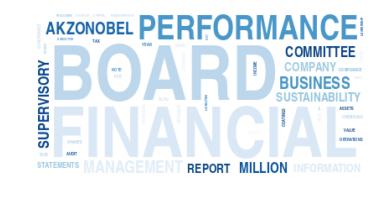

Saved to: ../output/Akzonobel_2017/Akzonobel_2017_basic_processing.png


In [9]:
# Let's go!
count_and_save(words, '_basic_processing')

## Stemming or lemmatization
TODO